# To analyasis the time to travel to seattle could affect the price. Therefore, split the price in listings.csv into two kind of price, which are price_holiday and price_nonholiday

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
calendar_pd = pd.read_csv('..\dataset_origin\\calendar.csv')
calendar_pd.shape

(1048575, 4)

In [3]:
# Function to show the columns with missing values in descending order.
def show_missing_values(df):
    missing_vals = pd.DataFrame()
    filtered_predicator = []
    missing_vals['amount'] = df.isnull().sum().sort_values(ascending = False)
    missing_vals['ratio'] = round(missing_vals['amount']/len(df),2)
    return missing_vals[missing_vals['amount']>0].dropna()

In [4]:
show_missing_values(calendar_pd)

,amount,ratio
price,348713,0.33


#  price are empty are assumed that they do not have, so drop those rows

In [5]:
# calendar_pd.at[calendar_pd['price'].isnull(), 'price'] = 0

In [6]:
calendar_pd = calendar_pd.dropna()

In [7]:
show_missing_values(calendar_pd)

,amount,ratio


In [8]:
calendar_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699862 entries, 0 to 1048574
Data columns (total 4 columns):
listing_id    699862 non-null int64
date          699862 non-null object
available     699862 non-null object
price         699862 non-null object
dtypes: int64(1), object(3)
memory usage: 26.7+ MB


# Convert date to datetime and classfify into different months
# Convert price to float

In [44]:
# basic conversions
calendar_pd['date'] = pd.to_datetime(calendar_pd['date'])
calendar_pd['price'] = calendar_pd['price'].str.replace("[$, ]", "").astype("float")
calendar_pd['month'] = calendar_pd["date"].dt.month

AttributeError: Can only use .str accessor with string values!

# Show the average rent among different months

In [46]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
        ha='center', va='bottom')

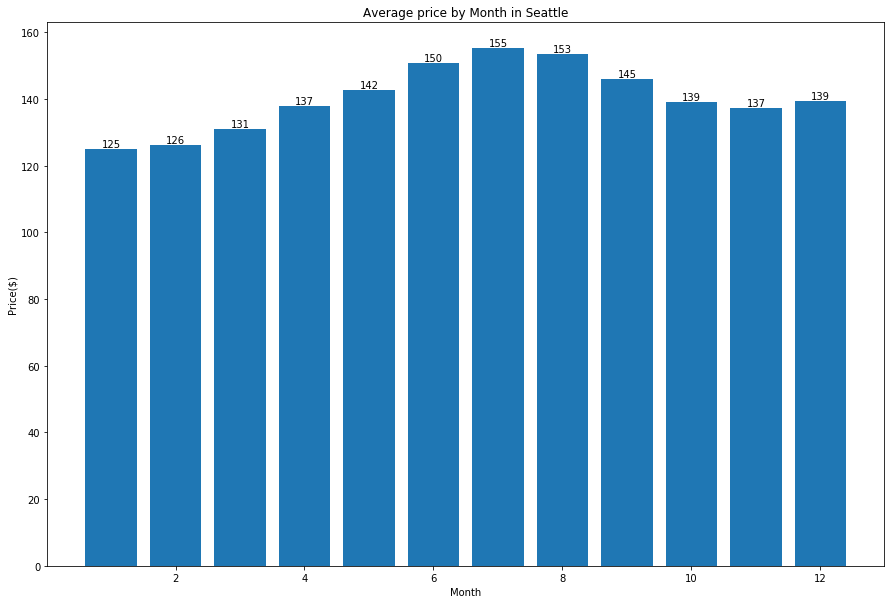

In [47]:
# average rent by month
plotdata2 = calendar_pd[['price']].groupby(calendar_pd["month"]).mean()
plt.figure(figsize=(15, 10))
ax = plt.subplot(1,1,1)
ax.set_title("Average price by Month in Seattle")
plt.xlabel("Month")
plt.ylabel("Price($)")
plt_average = plt.bar(plotdata2.index, plotdata2['price'])
autolabel(plt_average)

In [13]:
# plt.figure(figsize=(15, 10))
# # revenue by month
# plotdata2 = calendar_pd[['price']].groupby(calendar_pd["month"]).sum()
# # plotdata2.rename(columns={'price':'revenue'}, inplace=True)

# ax = plt.subplot(1,1,1)
# ax.set_title("Total avenue per month")
# splot = plt.bar(plotdata2.index, plotdata2['price'])

# After observing the plot of average price by month, we know that June - Angust have the highest average rent among a year, with the rent peaking in July.  
## After google it, we find this time in Seattle has beautiful sunshine, wildflower and very little rain, so host will normally raise up their rent.
## Therefore, we split our response into two-seaon' rent, we will notice the improvement of preidcting accuracy in later demo. 

In [14]:
calendar_pd

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1
...,...,...,...,...,...
1048570,5386937,2016-10-20,t,120.0,10
1048571,5386937,2016-10-21,t,120.0,10
1048572,5386937,2016-10-22,t,120.0,10
1048573,5386937,2016-10-23,t,120.0,10


# To split the calender dataframe into two dataframes by checking the month whether is in holiday season[6,7,8]

In [48]:
# Use Series built-in function: isin() and ~isin()
holiday_season = [6,7,8]
df_holiday = calendar_pd[calendar_pd['month'].isin(holiday_season)]
df_nonholiday = calendar_pd[~calendar_pd['month'].isin(holiday_season)]

# Merge the rows, which have the same listing_id and use the median value as the price

In [49]:
df_holiday = df_holiday[['price']].groupby(calendar_pd["listing_id"]).mean().reset_index()
df_nonholiday = df_nonholiday[['price']].groupby(calendar_pd["listing_id"]).mean().reset_index()

In [50]:
df_holiday

,listing_id,price
0,3335,120.000000
1,5682,60.000000
2,6606,92.826087
3,9531,185.000000
4,9534,125.000000
...,...,...
2172,10309898,250.000000
2173,10310373,20.000000
2174,10331249,45.000000
2175,10339145,285.086957


In [18]:
df_nonholiday

,listing_id,price
0,3335,120.0
1,5682,50.0
2,6606,90.0
3,7369,85.0
4,9460,109.0
...,...,...
2790,10309898,250.0
2791,10310373,20.0
2792,10331249,45.0
2793,10339145,219.0


## Verify the difference between the two seasons. 

In [19]:
df_nonholiday.loc[df_nonholiday['listing_id'] == 6475289]

,listing_id,price
1513,6475289,139.0


In [20]:
df_holiday.loc[df_holiday['listing_id'] == 6475289]

,listing_id,price
1277,6475289,179.0


In [51]:
listing_df = pd.read_csv("..\dataset_origin\\listings.csv")

In [52]:
listing_df.rename(columns={'id':'listing_id'}, inplace=True)
df_holiday.rename(columns={'price':'price_holiday'}, inplace=True)
df_nonholiday.rename(columns={'price':'price_nonholiday'}, inplace=True)

In [53]:
df_nonholiday

,listing_id,price_nonholiday
0,3335,120.000000
1,5682,51.377880
2,6606,92.857143
3,7369,85.000000
4,9460,113.736842
...,...,...
2790,10309898,250.000000
2791,10310373,20.000000
2792,10331249,45.000000
2793,10339145,222.003663


In [54]:
# MERGE holiday_price
merged_holiday = pd.merge(listing_df, df_holiday, on = 'listing_id', how='left')
# Merge nonholiday_price
merged_holiday_nonholiday = pd.merge(merged_holiday, df_nonholiday, on = 'listing_id', how='left')

In [55]:
merged_holiday_nonholiday['price'] = merged_holiday_nonholiday['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill the na in price_holiday and price_nonholiday with the value in price

In [56]:
merged_holiday_nonholiday['price_holiday'].isnull().sum()
merged_holiday_nonholiday['price_nonholiday'].isnull().sum()

1023

In [57]:
merged_holiday_nonholiday['price_holiday'] = merged_holiday_nonholiday['price_holiday'].fillna(merged_holiday_nonholiday['price'])
merged_holiday_nonholiday['price_nonholiday'] = merged_holiday_nonholiday['price_nonholiday'].fillna(merged_holiday_nonholiday['price'])

# holiday dataset split

In [58]:
merged_holiday_nonholiday['extra_people']


0        $5.00
1        $0.00
2       $25.00
3        $0.00
4       $15.00
         ...  
3813     $0.00
3814    $25.00
3815    $20.00
3816     $0.00
3817     $0.00
Name: extra_people, Length: 3818, dtype: object

In [59]:
merged_holiday_nonholiday['extra_people'] = merged_holiday_nonholiday['extra_people'].replace('[\$,]', '', regex=True).astype(float)

In [60]:
#Check for columns infomation
merged_holiday_nonholiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 94 columns):
listing_id                          3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null float64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      34

Number of neighbourhood : 82
Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
South Park              2
Pike Market             2
Fairmount Park          1
Roxhill                 1
North College Park      1
Name: neighbourhood, Length: 81, dtype: int64


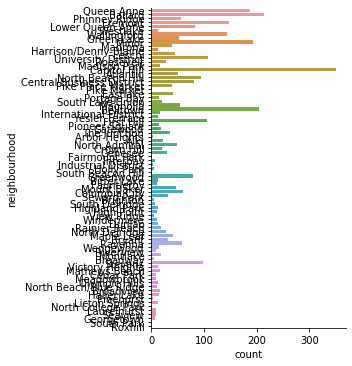

In [61]:
#print the unique values for neighborhood
print("Number of neighbourhood :", len(merged_holiday_nonholiday["neighbourhood"].unique()))

# neighborhood plot
print(merged_holiday_nonholiday["neighbourhood"].value_counts())
sb.catplot(y = "neighbourhood", data = merged_holiday, kind = "count")

Number of neighbourhood_cleansed : 87
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64


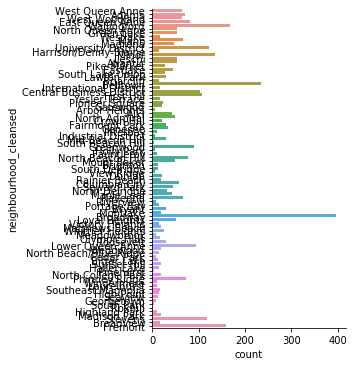

In [62]:
#print the unique values for neighbourhood_cleansed
print("Number of neighbourhood_cleansed :", len(merged_holiday_nonholiday["neighbourhood_cleansed"].unique()))

# neighbourhood_cleansed plot
print(merged_holiday_nonholiday["neighbourhood_cleansed"].value_counts())
sb.catplot(y = "neighbourhood_cleansed", data = merged_holiday, kind = "count")

Number of neighbourhood_group_cleansed : 17
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64


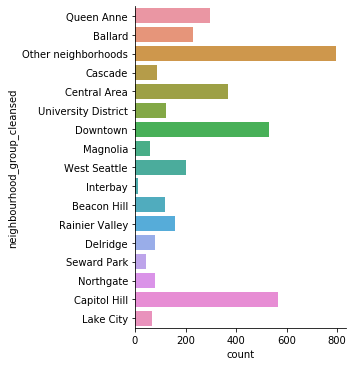

In [63]:
#print the unique values for neighbourhood_group_cleansed
print("Number of neighbourhood_group_cleansed :", len(merged_holiday_nonholiday["neighbourhood_group_cleansed"].unique()))

# neighbourhood_group_cleansed plot
print(merged_holiday_nonholiday["neighbourhood_group_cleansed"].value_counts())
sb.catplot(y = "neighbourhood_group_cleansed", data = merged_holiday, kind = "count")

Number of host_neighbourhood : 103
Capitol Hill            405
Belltown                254
Ballard                 210
Minor                   191
Queen Anne              189
                       ... 
Kauaʻi                    1
Clairemont Mesa East      1
Baldwin Hills             1
Beverly Hills             1
Forestland                1
Name: host_neighbourhood, Length: 102, dtype: int64


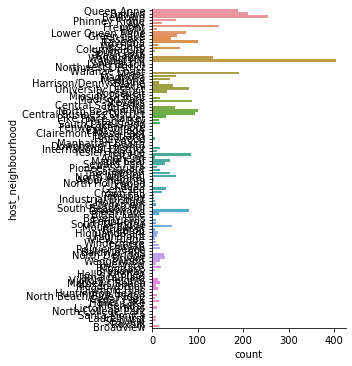

In [64]:

#print the unique values for host_neighbourhood
print("Number of host_neighbourhood :", len(merged_holiday_nonholiday["host_neighbourhood"].unique()))

# host_neighbourhood plot
print(merged_holiday_nonholiday["host_neighbourhood"].value_counts())
sb.catplot(y = "host_neighbourhood", data = merged_holiday, kind = "count")

Number of zipcode : 29
98122          420
98103          394
98102          339
98105          225
98109          202
98101          201
98144          200
98121          196
98107          180
98115          178
98112          167
98117          164
98118          154
98119          143
98116          112
98104           95
98125           71
98199           66
98126           63
98106           58
98108           56
98133           46
98136           44
98177           19
98178            7
98146            5
98134            5
99\r\n98122      1
Name: zipcode, dtype: int64


D:\jupyter notebook\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)


D:\jupyter notebook\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


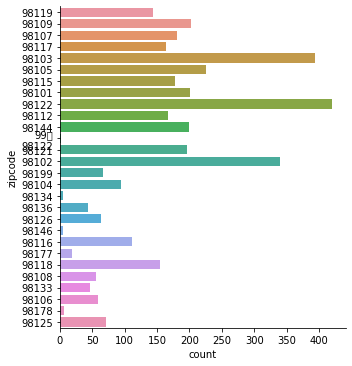

In [65]:
#print the unique values for zipcode
print("Number of zipcode :", len(merged_holiday_nonholiday["zipcode"].unique()))

# zipcode plot
print(merged_holiday_nonholiday["zipcode"].value_counts())
sb.catplot(y = "zipcode", data = merged_holiday, kind = "count")

In [66]:
#In the previous data cleasing part, we have already found that neighbourhood_group_cleansed and neighbourhood_cleansed have no missing value.
#By plotting the unique categories, we find that neighbourhood_group_cleansed has fewer categories. 
#Therefore, we choose this as criteria for zoning.

In [67]:
#merged_holiday.loc[merged_holiday.neighbourhood_group_cleansed=='5']
#merged_holiday.loc[merged_holiday.zipcode=='t']
#merged_holiday=merged_holiday.drop([1933,1942])
#merged_holiday


split based on mean of price

When using itertuples, if we have space or # in column names, it will be converted to random number
Therefore, replace space in column names by "_"

In [68]:
merged_holiday_nonholiday.columns = merged_holiday_nonholiday.columns.str.replace(' ', '_')
merged_holiday_nonholiday.columns = merged_holiday_nonholiday.columns.str.replace('#', '')
#Check
print(merged_holiday_nonholiday.columns)

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',

group data by their neighbourhood_group_cleansed attributes.

In [70]:
Capitol_Hill=[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Capitol Hill':
        Capitol_Hill.append(row)
Capitol_Hill=pd.DataFrame(Capitol_Hill, columns=row._fields)
Capitol_Hill.price_holiday.describe()






count    567.000000
mean     136.132609
std       95.187831
min       22.000000
25%       81.200000
50%      110.000000
75%      152.000000
max      760.465116
Name: price_holiday, dtype: float64

In [71]:
Other_neighborhoods =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Other neighborhoods':
        Other_neighborhoods.append(row)
Other_neighborhoods=pd.DataFrame(Other_neighborhoods, columns=row._fields)
Other_neighborhoods.price_holiday.describe()

count     794.000000
mean      125.013955
std        91.993814
min        25.000000
25%        67.250000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price_holiday, dtype: float64

In [72]:
Interbay =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Interbay':
        Interbay.append(row)
Interbay=pd.DataFrame(Interbay, columns=row._fields)
Interbay.price_holiday.describe()

count     11.000000
mean     120.316171
std       64.695128
min       50.000000
25%       79.945652
50%       96.978261
75%      154.945652
max      250.000000
Name: price_holiday, dtype: float64

In [73]:
Seward_Park =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Seward Park':
        Seward_Park.append(row)
Seward_Park=pd.DataFrame(Seward_Park, columns=row._fields)
Seward_Park.price_holiday.describe()


count     44.000000
mean     111.525004
std       72.884052
min       34.000000
25%       65.000000
50%       93.000000
75%      121.466667
max      375.000000
Name: price_holiday, dtype: float64

In [74]:
Magnolia =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Magnolia':
        Magnolia.append(row)
Magnolia=pd.DataFrame(Magnolia, columns=row._fields)
Magnolia.price_holiday.describe()

count     61.000000
mean     194.208564
std      175.909726
min       32.826087
25%       78.000000
50%      129.000000
75%      228.000000
max      950.000000
Name: price_holiday, dtype: float64

In [75]:
Lake_City =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Lake City':
        Lake_City.append(row)
Lake_City=pd.DataFrame(Lake_City, columns=row._fields)
Lake_City.price_holiday.describe()

count     67.000000
mean      92.671642
std       57.212625
min       35.000000
25%       55.000000
50%       70.000000
75%      108.000000
max      252.000000
Name: price_holiday, dtype: float64

In [76]:
Delridge =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Delridge':
        Delridge.append(row)
Delridge=pd.DataFrame(Delridge, columns=row._fields)
Delridge.price_holiday.describe()

count     79.000000
mean      87.199801
std       44.868035
min       35.000000
25%       58.500000
50%       75.000000
75%       99.784091
max      300.000000
Name: price_holiday, dtype: float64

In [77]:
Northgate =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Northgate':
        Northgate.append(row)
Northgate=pd.DataFrame(Northgate, columns=row._fields)
Northgate.price_holiday.describe()


count     80.000000
mean      93.384211
std       53.731151
min       34.239130
25%       59.750000
50%       82.209302
75%      114.369565
max      438.953488
Name: price_holiday, dtype: float64

In [78]:
Cascade =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Cascade':
        Cascade.append(row)
Cascade=pd.DataFrame(Cascade, columns=row._fields)
Cascade.price_holiday.describe()


count     89.000000
mean     147.193816
std      115.218938
min       44.826087
25%       89.000000
50%      120.000000
75%      159.456522
max      775.000000
Name: price_holiday, dtype: float64

In [79]:
Beacon_Hill =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Beacon Hill':
        Beacon_Hill.append(row)
Beacon_Hill=pd.DataFrame(Beacon_Hill, columns=row._fields)
Beacon_Hill.price_holiday.describe()

count    118.000000
mean     100.954814
std       66.210413
min       35.000000
25%       60.000000
50%       80.000000
75%      120.000000
max      427.260870
Name: price_holiday, dtype: float64

In [80]:
University_District =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='University District':
        University_District.append(row)
University_District=pd.DataFrame(University_District, columns=row._fields)
University_District.price_holiday.describe()

count    122.000000
mean     103.896979
std       90.256770
min       28.000000
25%       65.000000
50%       85.000000
75%      105.000000
max      700.000000
Name: price_holiday, dtype: float64

In [81]:
Rainier_Valley =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Rainier Valley':
        Rainier_Valley.append(row)
Rainier_Valley=pd.DataFrame(Rainier_Valley, columns=row._fields)
Rainier_Valley.price_holiday.describe()


count    159.000000
mean     100.112714
std       74.751815
min       25.000000
25%       59.500000
50%       80.000000
75%      114.619565
max      603.666667
Name: price_holiday, dtype: float64

In [82]:
West_Seattle =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='West Seattle':
        West_Seattle.append(row)
West_Seattle=pd.DataFrame(West_Seattle, columns=row._fields)
West_Seattle.price_holiday.describe()


count    203.000000
mean     155.092710
std      100.372375
min       35.652174
25%       83.913043
50%      120.000000
75%      200.000000
max      525.000000
Name: price_holiday, dtype: float64

In [83]:
Ballard =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Ballard':
        Ballard.append(row)
Ballard=pd.DataFrame(Ballard, columns=row._fields)
Ballard.price_holiday.describe()


count    230.000000
mean     132.488430
std       99.143081
min       25.000000
25%       70.739130
50%       97.500000
75%      150.000000
max      663.675325
Name: price_holiday, dtype: float64

In [84]:
Downtown=[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Downtown':
        Downtown.append(row)
Downtown=pd.DataFrame(Downtown, columns=row._fields)
Downtown.price_holiday.describe()




count    530.000000
mean     205.113511
std      128.549216
min       37.921348
25%      117.820652
50%      169.500000
75%      250.000000
max      999.000000
Name: price_holiday, dtype: float64

In [85]:
Central_Area =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Central Area':
        Central_Area.append(row)
Central_Area=pd.DataFrame(Central_Area, columns=row._fields)
Central_Area.price_holiday.describe()



count    369.000000
mean     139.061305
std       93.607921
min       35.000000
25%       79.000000
50%      109.000000
75%      168.000000
max      700.000000
Name: price_holiday, dtype: float64

In [86]:
Queen_Anne=[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Queen Anne':
        Queen_Anne.append(row)
Queen_Anne=pd.DataFrame(Queen_Anne, columns=row._fields)
Queen_Anne.price_holiday.describe()

count     295.000000
mean      168.783306
std       134.453231
min        20.000000
25%        95.000000
50%       125.000000
75%       194.793478
max      1161.500000
Name: price_holiday, dtype: float64

create an array of dataframes


In [87]:
cities=[Other_neighborhoods,Capitol_Hill,Downtown,Central_Area,Queen_Anne,Ballard,West_Seattle,Rainier_Valley,University_District,Beacon_Hill,Cascade,Northgate,Delridge,Lake_City,Magnolia, Seward_Park, Interbay]

 We can divide cities based on the mean value  
mean of price >150-----Tier_1
100<mean of price <150-----Tier_2
mean of price <100-----Tier_3

In [88]:
#Create 3 empty dataframes
Tier_1=pd.DataFrame(columns=row._fields)
Tier_2=pd.DataFrame(columns=row._fields)
Tier_3=pd.DataFrame(columns=row._fields)
#group different cities according to the mean value of price.
for i in cities:
    #print(i)
    if(i.price_holiday.mean()>150):
        Tier_1=Tier_1.append(i)
    if(i.price_holiday.mean()<150 and i.price.mean()>100):
        Tier_2= Tier_2.append(i)
    if(i.price_holiday.mean()<100):
        Tier_3=Tier_3.append(i)
# For checking

Tier_1.price.describe()
Tier_2.price.describe()
Tier_3.price.describe()

count    226.000000
mean      87.929204
std       45.874847
min       30.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      300.000000
Name: price, dtype: float64

In [89]:
#produce new csv files.
#Tier_1.to_csv('..\dataset_filter\Tier_1_holiday.csv',index=False)
#Tier_2.to_csv('..\dataset_filter\Tier_2_holiday.csv',index=False)
#Tier_3.to_csv('..\dataset_filter\Tier_3_holiday.csv',index=False)

# split based on districs

In [90]:
# We found that there are 7 districts in Seattle, so we put different neighbourhoods into different districts.
District_1=[]
District_2=[]
District_3=[]
District_4=[]
District_5=[]
District_6=[]
District_7=[]
Other_neighborhoods=[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Delridge':
        District_1.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Capitol Hill':
        District_3.append(row)

for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Downtown':
        District_7.append(row)       
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Central Area' :
        District_3.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Queen Anne':
        District_7.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Ballard':
        District_6.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='West Seattle':
        District_1.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Rainier Valley':
        District_2.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='University District':
        District_4.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Beacon Hill':
        District_2.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Cascade':
        District_7.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Northgate':
        District_5.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Lake City':
        District_5.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Magnolia':
        District_7.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Seward Park':
        District_2.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Interbay':
        District_7.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='North Beacon Hill':
        District_3.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='S Morgan St, Seattle, WA 98108, United States':
        Other_neighborhoods.append(row)
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Other neighborhoods':
        Other_neighborhoods.append(row)
#convert tuples to corresponding dataframes.       

District_1 = pd.DataFrame(District_1, columns=row._fields)
District_2 = pd.DataFrame(District_2, columns=row._fields)
District_3 = pd.DataFrame(District_3, columns=row._fields)
District_4 = pd.DataFrame(District_4, columns=row._fields)
District_5 = pd.DataFrame(District_5, columns=row._fields)
District_6 = pd.DataFrame(District_6, columns=row._fields)
District_7 = pd.DataFrame(District_7, columns=row._fields)
Other_neighborhoods = pd.DataFrame(Other_neighborhoods, columns=row._fields)

print(type(District_1))
print(District_1.shape)
District_1.head()

print(type(District_2))
print(District_2.shape)
District_2.head()

print(type(District_3))
print(District_3.shape)
District_3.head()

print(type(District_4))
print(District_4.shape)
District_4.head()

print(type(District_5))
print(District_5.shape)
District_5.head()

print(type(District_6))
print(District_6.shape)
District_6.head()

print(type(District_7))
print(District_7.shape)
District_7.head()

print(type(Other_neighborhoods))
print(Other_neighborhoods.shape)
Other_neighborhoods.head()



<class 'pandas.core.frame.DataFrame'>
(282, 95)
<class 'pandas.core.frame.DataFrame'>
(321, 95)
<class 'pandas.core.frame.DataFrame'>
(936, 95)
<class 'pandas.core.frame.DataFrame'>
(122, 95)
<class 'pandas.core.frame.DataFrame'>
(147, 95)
<class 'pandas.core.frame.DataFrame'>
(230, 95)
<class 'pandas.core.frame.DataFrame'>
(986, 95)
<class 'pandas.core.frame.DataFrame'>
(794, 95)


,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday
0,280,314180,https://www.airbnb.com/rooms/314180,2.016010e+13,4/1/2016,Sunny Home w/ Views in Wallingford,My historic and recently remodeled house is on...,"Enjoy commanding views of downtown, Mt. Rainer...",My historic and recently remodeled house is on...,none,...,NaN,WASHINGTON,f,strict,f,f,3,0.51,300.0,300.000000
1,281,8670079,https://www.airbnb.com/rooms/8670079,2.016010e+13,4/1/2016,"Furnished, great spot, near UW",This furnished home is a sweet bungalow in a g...,"Great for families, or visiting guests needing...",This furnished home is a sweet bungalow in a g...,none,...,NaN,WASHINGTON,f,moderate,f,f,1,NaN,150.0,150.000000
2,282,4868135,https://www.airbnb.com/rooms/4868135,2.016010e+13,4/1/2016,Designer 2 Bdrm Fremont/Wallingford,"Luxurious, new,spacious 2 bdrm apartment in on...",Luxurious and all new spacious 2 bedroom apart...,"Luxurious, new,spacious 2 bdrm apartment in on...",none,...,NaN,WASHINGTON,f,strict,f,f,7,0.89,369.5,190.808824
3,283,5336585,https://www.airbnb.com/rooms/5336585,2.016010e+13,4/1/2016,Beautiful Loft Apartment UW,I have a great loft apartment in the Wallingfo...,NaN,I have a great loft apartment in the Wallingfo...,none,...,NaN,WASHINGTON,f,flexible,f,f,1,0.10,75.0,75.000000
4,284,1427103,https://www.airbnb.com/rooms/1427103,2.016010e+13,4/1/2016,Wallingford Private 1BD Apartment,Our eco-friendly furnished apartment features ...,Our basement apartment is painted with low VOC...,Our eco-friendly furnished apartment features ...,none,...,NaN,WASHINGTON,f,strict,f,f,2,2.78,95.0,93.128514


In [91]:
# We find that houses in District1,District2,District4 and District5 are not so many, therefore, we cancatenate them into District_1245.
District_1245=pd.concat([District_1,District_2,District_4,District_5])

In [92]:
District_1245_new=District_1245.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_3_new=District_3.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_6_new=District_6.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_7_new=District_7.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
Other_neighborhoods_new=Other_neighborhoods.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")

In [93]:
#Chcek
District_1245_new

,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2158,3279728,https://www.airbnb.com/rooms/3279728,2.016010e+13,4/1/2016,Stylish West Seattle 3BD,Recently remodeled mid century home is squarel...,"This is a clean, comfortable, safe and secure,...",Recently remodeled mid century home is squarel...,none,...,f,2,0.52,150.000000,150.000000,,,,,
1,2159,8446766,https://www.airbnb.com/rooms/8446766,2.016010e+13,4/1/2016,Beautiful West Seattle Getaway,"Clean comfortable room, queen size memory foam...","You can bring your pets, under 10 minutes to d...","Clean comfortable room, queen size memory foam...",none,...,f,2,0.88,43.826087,43.830882,,,,,
2,2160,9733841,https://www.airbnb.com/rooms/9733841,2.016010e+13,4/1/2016,"Private, Cozy, Convenient W Seattle",Private bed and bath! Room features wonderful ...,This space was designed to give you maximum co...,Private bed and bath! Room features wonderful ...,none,...,f,1,NaN,45.000000,45.000000,,,,,
3,2161,5852034,https://www.airbnb.com/rooms/5852034,2.016010e+13,4/1/2016,Maiden Mansion - Tiny House,I designed and built this tiny house to be a c...,I designed and built this tiny house on wheels...,I designed and built this tiny house to be a c...,none,...,f,1,7.01,102.108696,100.456000,,,,,
4,2162,1851837,https://www.airbnb.com/rooms/1851837,2.016010e+13,4/1/2016,Awesome cozy One Bedroom Apartment,Enjoy the-lower level of our home a great livi...,Enjoy the-lower level of our home a great livi...,Enjoy the-lower level of our home a great livi...,none,...,f,1,0.37,95.000000,95.000000,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3269,6438099,https://www.airbnb.com/rooms/6438099,2.016010e+13,4/1/2016,Private room with private bath,Private room with private bath and patio deck ...,Please excuse the mess in the picture. The act...,Private room with private bath and patio deck ...,none,...,f,4,NaN,55.000000,55.000000,,,,,
143,3270,7650458,https://www.airbnb.com/rooms/7650458,2.016010e+13,4/1/2016,"Large, Beautiful, Affordable Condo",Condo is beautifully appointed & comfortable. ...,This is a top floor condo in a 16 unit building.,Condo is beautifully appointed & comfortable. ...,none,...,f,1,0.36,70.000000,70.000000,,,,,
144,3271,7219541,https://www.airbnb.com/rooms/7219541,2.016010e+13,4/1/2016,A beautiful house with a lake view,"Neighborhood, Seattle, near NE 123rd St and Sa...",NaN,"Neighborhood, Seattle, near NE 123rd St and Sa...",none,...,f,1,0.21,80.000000,80.000000,,,,,
145,3272,4092037,https://www.airbnb.com/rooms/4092037,2.016010e+13,4/1/2016,Modern 3 BR home in Seattle,Enjoy a brand-new modern home in Seattle just ...,"Enjoy a brand-new, modern home (occupied since...",Enjoy a brand-new modern home in Seattle just ...,none,...,f,1,0.08,250.000000,250.000000,,,,,


In [94]:
District_1245_new['District_1245']=1
District_1245_new['District_3']=0
District_1245_new['District_6']=0
District_1245_new['District_7']=0
District_1245_new['Other_neighborhoods']=0
#Check
District_1245_new

,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2158,3279728,https://www.airbnb.com/rooms/3279728,2.016010e+13,4/1/2016,Stylish West Seattle 3BD,Recently remodeled mid century home is squarel...,"This is a clean, comfortable, safe and secure,...",Recently remodeled mid century home is squarel...,none,...,f,2,0.52,150.000000,150.000000,1,0,0,0,0
1,2159,8446766,https://www.airbnb.com/rooms/8446766,2.016010e+13,4/1/2016,Beautiful West Seattle Getaway,"Clean comfortable room, queen size memory foam...","You can bring your pets, under 10 minutes to d...","Clean comfortable room, queen size memory foam...",none,...,f,2,0.88,43.826087,43.830882,1,0,0,0,0
2,2160,9733841,https://www.airbnb.com/rooms/9733841,2.016010e+13,4/1/2016,"Private, Cozy, Convenient W Seattle",Private bed and bath! Room features wonderful ...,This space was designed to give you maximum co...,Private bed and bath! Room features wonderful ...,none,...,f,1,NaN,45.000000,45.000000,1,0,0,0,0
3,2161,5852034,https://www.airbnb.com/rooms/5852034,2.016010e+13,4/1/2016,Maiden Mansion - Tiny House,I designed and built this tiny house to be a c...,I designed and built this tiny house on wheels...,I designed and built this tiny house to be a c...,none,...,f,1,7.01,102.108696,100.456000,1,0,0,0,0
4,2162,1851837,https://www.airbnb.com/rooms/1851837,2.016010e+13,4/1/2016,Awesome cozy One Bedroom Apartment,Enjoy the-lower level of our home a great livi...,Enjoy the-lower level of our home a great livi...,Enjoy the-lower level of our home a great livi...,none,...,f,1,0.37,95.000000,95.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3269,6438099,https://www.airbnb.com/rooms/6438099,2.016010e+13,4/1/2016,Private room with private bath,Private room with private bath and patio deck ...,Please excuse the mess in the picture. The act...,Private room with private bath and patio deck ...,none,...,f,4,NaN,55.000000,55.000000,1,0,0,0,0
143,3270,7650458,https://www.airbnb.com/rooms/7650458,2.016010e+13,4/1/2016,"Large, Beautiful, Affordable Condo",Condo is beautifully appointed & comfortable. ...,This is a top floor condo in a 16 unit building.,Condo is beautifully appointed & comfortable. ...,none,...,f,1,0.36,70.000000,70.000000,1,0,0,0,0
144,3271,7219541,https://www.airbnb.com/rooms/7219541,2.016010e+13,4/1/2016,A beautiful house with a lake view,"Neighborhood, Seattle, near NE 123rd St and Sa...",NaN,"Neighborhood, Seattle, near NE 123rd St and Sa...",none,...,f,1,0.21,80.000000,80.000000,1,0,0,0,0
145,3272,4092037,https://www.airbnb.com/rooms/4092037,2.016010e+13,4/1/2016,Modern 3 BR home in Seattle,Enjoy a brand-new modern home in Seattle just ...,"Enjoy a brand-new, modern home (occupied since...",Enjoy a brand-new modern home in Seattle just ...,none,...,f,1,0.08,250.000000,250.000000,1,0,0,0,0


Change column values of DataFrame District_3_new

In [95]:
District_3_new['District_1245']=0
District_3_new['District_3']=1
District_3_new['District_6']=0
District_3_new['District_7']=0
District_3_new['Other_neighborhoods']=0
#Check
District_3_new

,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2514,6214517,https://www.airbnb.com/rooms/6214517,2.016010e+13,4/1/2016,Chic 1 Bed with Fantastic Lake View,Sparkling new unit. 800 sq ft w/open Living/D...,"The apartment is a very private space, located...",Sparkling new unit. 800 sq ft w/open Living/D...,none,...,f,2,3.25,200.000000,137.811594,0,1,0,0,0
1,2515,8036620,https://www.airbnb.com/rooms/8036620,2.016010e+13,4/1/2016,Elegant home in N. Capitol Hill,A 4500 square foot elegant home that is the pe...,"Enter the front door, into a grand formal entr...",A 4500 square foot elegant home that is the pe...,none,...,f,1,1.20,525.000000,530.245902,0,1,0,0,0
2,2516,8152764,https://www.airbnb.com/rooms/8152764,2.016010e+13,4/1/2016,Beautiful Water View Apartment,Our home is cozy with lots of natural light. T...,The view of Portage Bay makes this space very ...,Our home is cozy with lots of natural light. T...,none,...,f,1,0.42,99.000000,99.000000,0,1,0,0,0
3,2517,6837751,https://www.airbnb.com/rooms/6837751,2.016010e+13,4/1/2016,1908 Craftsman home - cozy room,This listing is for a cozy room nestled in the...,Our space is close to all the activities that ...,This listing is for a cozy room nestled in the...,none,...,f,2,3.77,90.000000,90.000000,0,1,0,0,0
4,2518,2459519,https://www.airbnb.com/rooms/2459519,2.016010e+13,4/1/2016,Fabulous Views of Lakes & Mountains,"Centrally located, minutes to downtown. Views ...",Welcome! Our house is ideally located for visi...,"Centrally located, minutes to downtown. Views ...",none,...,f,1,1.46,760.465116,773.166023,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1058,7048843,https://www.airbnb.com/rooms/7048843,2.016010e+13,4/1/2016,"Large Room, 2-mile to downtown",House is 2 miles from city center. Private la...,House is two-level. Your room is private with...,House is 2 miles from city center. Private la...,none,...,f,2,4.79,40.000000,39.620253,0,1,0,0,0
932,1059,879181,https://www.airbnb.com/rooms/879181,2.016010e+13,4/1/2016,In Jimi Hendrix's neighborhood 3,NaN,One well-furnished private room is available i...,One well-furnished private room is available i...,none,...,f,2,0.86,61.413043,61.434426,0,1,0,0,0
933,1060,6423488,https://www.airbnb.com/rooms/6423488,2.016010e+13,4/1/2016,Modern and cozy home in Seattle,Modern and green built home just a few minutes...,NaN,Modern and green built home just a few minutes...,none,...,f,1,0.85,149.000000,149.000000,0,1,0,0,0
934,1061,7241905,https://www.airbnb.com/rooms/7241905,2.016010e+13,4/1/2016,1 Bedroom Apt near Downtown Seattle,Hi! Our apartment comfortably accommodates 2 p...,NaN,Hi! Our apartment comfortably accommodates 2 p...,none,...,f,1,1.35,115.000000,115.000000,0,1,0,0,0


In [96]:
District_6_new['District_1245']=0
District_6_new['District_3']=0
District_6_new['District_6']=1
District_6_new['District_7']=0
District_6_new['Other_neighborhoods']=0
#Check
District_6_new

,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,65,7077910,https://www.airbnb.com/rooms/7077910,2.016010e+13,4/1/2016,"Modern Townhouse, Heart of Ballard!","LEED certified ""green"" 3-story townhouse with ...","3 story townhouse, modern design, beautiful hi...","LEED certified ""green"" 3-story townhouse with ...",none,...,f,1,1.82,170.000000,141.481481,0,0,1,0,0
1,66,3772674,https://www.airbnb.com/rooms/3772674,2.016010e+13,4/1/2016,Cozy Ballard Apartment,You'll feel right at home in our private entra...,Looking for a place that feels like home? Our...,You'll feel right at home in our private entra...,none,...,f,1,3.94,89.239130,89.156863,0,0,1,0,0
2,67,7021906,https://www.airbnb.com/rooms/7021906,2.016010e+13,4/1/2016,Plum Modern - 5 bdrm Tranquility,A beautiful sun-filled homes in an amazing Bal...,"Welcome to the Plum house, a modern home finis...",A beautiful sun-filled homes in an amazing Bal...,none,...,f,1,1.38,663.675325,436.397959,0,0,1,0,0
3,68,7618605,https://www.airbnb.com/rooms/7618605,2.016010e+13,4/1/2016,1BR-Ultra Hip Ballard-Walk to Bars!,This 1BR is in a great location! Walking dist...,"1BR, open kitchen, large patio, large bathroom...",This 1BR is in a great location! Walking dist...,none,...,f,1,1.01,175.000000,175.000000,0,0,1,0,0
4,69,10234558,https://www.airbnb.com/rooms/10234558,2.016010e+13,4/1/2016,Cozy BR in heart of lively Ballard,Quite and comfy room for two with private bath...,This is a condo building with secure access an...,Quite and comfy room for two with private bath...,none,...,f,1,NaN,55.086957,55.133080,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3300,1488166,https://www.airbnb.com/rooms/1488166,2.016010e+13,4/1/2016,Entire Home - Beautiful Sunset Hill,"Immaculate, light-filled home in Sunset Hill w...",_______________________ BEDROOMS AND BATHS: 3 ...,"Immaculate, light-filled home in Sunset Hill w...",none,...,f,3,0.65,475.000000,475.000000,0,0,1,0,0
226,3301,463768,https://www.airbnb.com/rooms/463768,2.016010e+13,4/1/2016,delux comfort+ in coolest 'hood,Relish in four-star comfort in a contemporary ...,"Relax and enjoy all the amenities of our 3,400...",Relish in four-star comfort in a contemporary ...,none,...,f,1,0.49,375.000000,375.000000,0,0,1,0,0
227,3302,4334804,https://www.airbnb.com/rooms/4334804,2.016010e+13,4/1/2016,"New, modern, kid-friendly home...","Brand new, spacious 2-brdm*, 2.5 bath home jus...",Our home has all the creature comforts of a Cr...,"Brand new, spacious 2-brdm*, 2.5 bath home jus...",none,...,f,1,NaN,450.000000,450.000000,0,0,1,0,0
228,3303,9331145,https://www.airbnb.com/rooms/9331145,2.016010e+13,4/1/2016,B&B on the Salty Sea,A 1977 Islander Freeport with a happy crew!,NaN,A 1977 Islander Freeport with a happy crew!,none,...,f,1,NaN,75.000000,75.000000,0,0,1,0,0


In [97]:
District_7_new['District_1245']=0
District_7_new['District_3']=0
District_7_new['District_6']=0
District_7_new['District_7']=1
District_7_new['Other_neighborhoods']=0
#Check
District_7_new

,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,1063,10273158,https://www.airbnb.com/rooms/10273158,2.016010e+13,4/1/2016,Pike Place High Rise 99 Walk Score,Out your front door is the heart and soul of S...,This beautiful new high rise studio is in the ...,Out your front door is the heart and soul of S...,none,...,f,6,NaN,134.934783,134.976923,0,0,0,1,0
1,1064,5615620,https://www.airbnb.com/rooms/5615620,2.016010e+13,4/1/2016,Downtown Apt by Pike Place Market,This cozy apartment is stocked with all the am...,This studio apartment features living room spa...,This cozy apartment is stocked with all the am...,none,...,f,3,5.98,132.771084,119.117647,0,0,0,1,0
2,1065,936484,https://www.airbnb.com/rooms/936484,2.016010e+13,4/1/2016,Marketside Flats next to Pike! MS1,The Marketside Flats is a fantastic home base ...,LOCATED RIGHT NEXT TO PIKE PLACE MARKET!!! You...,The Marketside Flats is a fantastic home base ...,none,...,f,1,0.46,296.228261,167.576208,0,0,0,1,0
3,1066,5415077,https://www.airbnb.com/rooms/5415077,2.016010e+13,4/1/2016,Spacious Room in Pike Place Market!,My spacious & private downtown Seattle condo i...,This large 2 bed 2 bath condo with floor-to-ce...,My spacious & private downtown Seattle condo i...,none,...,f,1,4.37,95.000000,93.750000,0,0,0,1,0
4,1067,938785,https://www.airbnb.com/rooms/938785,2.016010e+13,4/1/2016,Best Ocean Views By Pike Place! PA1,Post Alley Court offers amazing views of Ellio...,"Water views from balcony, only 1/2 block to Pi...",Post Alley Court offers amazing views of Ellio...,none,...,f,1,0.63,317.543478,177.558052,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1917,2134911,https://www.airbnb.com/rooms/2134911,2.016010e+13,4/1/2016,The Studio at Mibbett Hollow - Boat,A quiet space with separate Entrance. The bath...,The “Studio at Mibbett Hollow' is in a Beautif...,A quiet space with separate Entrance. The bath...,none,...,t,2,0.27,96.978261,97.000000,0,0,0,1,0
982,1918,5002964,https://www.airbnb.com/rooms/5002964,2.016010e+13,4/1/2016,10 Minutes from Downtown Seattle,Easy access from the SEA-TAC. 10 minutes fro...,Upper floor balcony where you can enjoy squirr...,Easy access from the SEA-TAC. 10 minutes fro...,none,...,f,1,1.00,50.000000,50.000000,0,0,0,1,0
983,1919,6780615,https://www.airbnb.com/rooms/6780615,2.016010e+13,4/1/2016,Modern Oasis in Magnolia,This mid-century modern apartment building has...,Bright and modern luxury apartment ideally loc...,This mid-century modern apartment building has...,none,...,t,6,2.05,210.293478,153.442623,0,0,0,1,0
984,1920,2586642,https://www.airbnb.com/rooms/2586642,2.016010e+13,4/1/2016,Charming modern 2 bdm getaway,New modern mother in law unit built 2014 in a ...,Serene and modern 2 bedroom/1 bath guest house...,New modern mother in law unit built 2014 in a ...,none,...,f,1,1.15,159.891304,160.000000,0,0,0,1,0


In [98]:
Other_neighborhoods_new['District_1245']=0
Other_neighborhoods_new['District_3']=0
Other_neighborhoods_new['District_6']=0
Other_neighborhoods_new['District_7']=0
Other_neighborhoods_new['Other_neighborhoods']=1
#Check
Other_neighborhoods_new

,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,280,314180,https://www.airbnb.com/rooms/314180,2.016010e+13,4/1/2016,Sunny Home w/ Views in Wallingford,My historic and recently remodeled house is on...,"Enjoy commanding views of downtown, Mt. Rainer...",My historic and recently remodeled house is on...,none,...,f,3,0.51,300.0,300.000000,0,0,0,0,1
1,281,8670079,https://www.airbnb.com/rooms/8670079,2.016010e+13,4/1/2016,"Furnished, great spot, near UW",This furnished home is a sweet bungalow in a g...,"Great for families, or visiting guests needing...",This furnished home is a sweet bungalow in a g...,none,...,f,1,NaN,150.0,150.000000,0,0,0,0,1
2,282,4868135,https://www.airbnb.com/rooms/4868135,2.016010e+13,4/1/2016,Designer 2 Bdrm Fremont/Wallingford,"Luxurious, new,spacious 2 bdrm apartment in on...",Luxurious and all new spacious 2 bedroom apart...,"Luxurious, new,spacious 2 bdrm apartment in on...",none,...,f,7,0.89,369.5,190.808824,0,0,0,0,1
3,283,5336585,https://www.airbnb.com/rooms/5336585,2.016010e+13,4/1/2016,Beautiful Loft Apartment UW,I have a great loft apartment in the Wallingfo...,NaN,I have a great loft apartment in the Wallingfo...,none,...,f,1,0.10,75.0,75.000000,0,0,0,0,1
4,284,1427103,https://www.airbnb.com/rooms/1427103,2.016010e+13,4/1/2016,Wallingford Private 1BD Apartment,Our eco-friendly furnished apartment features ...,Our basement apartment is painted with low VOC...,Our eco-friendly furnished apartment features ...,none,...,f,2,2.78,95.0,93.128514,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,3809,6120046,https://www.airbnb.com/rooms/6120046,2.016010e+13,4/1/2016,Lake Veiw Cottage in Fremont,From the deck of this quaint little apartment ...,This one bedroom apartment (Hippy Shack) is de...,From the deck of this quaint little apartment ...,none,...,f,1,1.18,120.0,120.000000,0,0,0,0,1
790,3810,262764,https://www.airbnb.com/rooms/262764,2.016010e+13,4/1/2016,Fremont Farmhouse,Our 2BR/1 bath home in Fremont's most fun neig...,"1200 ft2 2BR, 1 Bath farmhouse with a large, t...",Our 2BR/1 bath home in Fremont's most fun neig...,none,...,f,1,1.56,154.0,154.000000,0,0,0,0,1
791,3811,8578490,https://www.airbnb.com/rooms/8578490,2.016010e+13,4/1/2016,Super Convenient Top Floor Apt,In the true spirit of AirBNB this unit is avai...,The building is older (1970's) so not the mode...,In the true spirit of AirBNB this unit is avai...,none,...,f,1,0.63,65.0,65.000000,0,0,0,0,1
792,3812,3383329,https://www.airbnb.com/rooms/3383329,2.016010e+13,4/1/2016,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,...,t,3,4.01,95.0,95.000000,0,0,0,0,1


In [99]:
new_listing=pd.concat([District_1245_new,District_3_new,District_6_new,District_7_new,Other_neighborhoods_new])
#check
new_listing

,Index,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_holiday,price_nonholiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2158,3279728,https://www.airbnb.com/rooms/3279728,2.016010e+13,4/1/2016,Stylish West Seattle 3BD,Recently remodeled mid century home is squarel...,"This is a clean, comfortable, safe and secure,...",Recently remodeled mid century home is squarel...,none,...,f,2,0.52,150.000000,150.000000,1,0,0,0,0
1,2159,8446766,https://www.airbnb.com/rooms/8446766,2.016010e+13,4/1/2016,Beautiful West Seattle Getaway,"Clean comfortable room, queen size memory foam...","You can bring your pets, under 10 minutes to d...","Clean comfortable room, queen size memory foam...",none,...,f,2,0.88,43.826087,43.830882,1,0,0,0,0
2,2160,9733841,https://www.airbnb.com/rooms/9733841,2.016010e+13,4/1/2016,"Private, Cozy, Convenient W Seattle",Private bed and bath! Room features wonderful ...,This space was designed to give you maximum co...,Private bed and bath! Room features wonderful ...,none,...,f,1,NaN,45.000000,45.000000,1,0,0,0,0
3,2161,5852034,https://www.airbnb.com/rooms/5852034,2.016010e+13,4/1/2016,Maiden Mansion - Tiny House,I designed and built this tiny house to be a c...,I designed and built this tiny house on wheels...,I designed and built this tiny house to be a c...,none,...,f,1,7.01,102.108696,100.456000,1,0,0,0,0
4,2162,1851837,https://www.airbnb.com/rooms/1851837,2.016010e+13,4/1/2016,Awesome cozy One Bedroom Apartment,Enjoy the-lower level of our home a great livi...,Enjoy the-lower level of our home a great livi...,Enjoy the-lower level of our home a great livi...,none,...,f,1,0.37,95.000000,95.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,3809,6120046,https://www.airbnb.com/rooms/6120046,2.016010e+13,4/1/2016,Lake Veiw Cottage in Fremont,From the deck of this quaint little apartment ...,This one bedroom apartment (Hippy Shack) is de...,From the deck of this quaint little apartment ...,none,...,f,1,1.18,120.000000,120.000000,0,0,0,0,1
790,3810,262764,https://www.airbnb.com/rooms/262764,2.016010e+13,4/1/2016,Fremont Farmhouse,Our 2BR/1 bath home in Fremont's most fun neig...,"1200 ft2 2BR, 1 Bath farmhouse with a large, t...",Our 2BR/1 bath home in Fremont's most fun neig...,none,...,f,1,1.56,154.000000,154.000000,0,0,0,0,1
791,3811,8578490,https://www.airbnb.com/rooms/8578490,2.016010e+13,4/1/2016,Super Convenient Top Floor Apt,In the true spirit of AirBNB this unit is avai...,The building is older (1970's) so not the mode...,In the true spirit of AirBNB this unit is avai...,none,...,f,1,0.63,65.000000,65.000000,0,0,0,0,1
792,3812,3383329,https://www.airbnb.com/rooms/3383329,2.016010e+13,4/1/2016,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,...,t,3,4.01,95.000000,95.000000,0,0,0,0,1


In [134]:
#new_listing.to_csv('..\\dataset_filter\\new_listing_holiday.csv',index=False)

# non holiday dataset split

In [101]:
Capitol_Hill=[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Capitol Hill':
        Capitol_Hill.append(row)
Capitol_Hill=pd.DataFrame(Capitol_Hill, columns=row._fields)
Capitol_Hill.price_nonholiday.describe()


count    567.000000
mean     132.613648
std       92.080567
min       22.000000
25%       80.332669
50%      109.662162
75%      150.000000
max      773.166023
Name: price_nonholiday, dtype: float64

In [102]:
Other_neighborhoods =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Other neighborhoods':
        Other_neighborhoods.append(row)
Other_neighborhoods=pd.DataFrame(Other_neighborhoods, columns=row._fields)
Other_neighborhoods.price_nonholiday.describe()

count     794.000000
mean      122.195550
std        88.922807
min        25.000000
25%        67.000000
50%        99.000000
75%       148.601415
max      1000.000000
Name: price_nonholiday, dtype: float64

In [103]:
Downtown=[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Downtown':
        Downtown.append(row)
Downtown=pd.DataFrame(Downtown, columns=row._fields)
Downtown.price_nonholiday.describe()

count    530.000000
mean     169.200297
std       91.306398
min       37.824427
25%      117.988708
50%      152.644512
75%      200.312268
max      999.000000
Name: price_nonholiday, dtype: float64

In [104]:
Central_Area =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Central Area':
        Central_Area.append(row)
Central_Area=pd.DataFrame(Central_Area, columns=row._fields)
Central_Area.price_nonholiday.describe()

count    369.000000
mean     132.765152
std       87.943521
min       34.981273
25%       77.814159
50%      107.360902
75%      158.349057
max      700.000000
Name: price_nonholiday, dtype: float64

In [105]:
Queen_Anne=[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Queen Anne':
        Queen_Anne.append(row)
Queen_Anne=pd.DataFrame(Queen_Anne, columns=row._fields)
Queen_Anne.price_nonholiday.describe()

count     295.000000
mean      162.436383
std       135.106244
min        20.000000
25%        95.500000
50%       120.000000
75%       178.108225
max      1461.805556
Name: price_nonholiday, dtype: float64

In [106]:
Ballard =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Ballard':
        Ballard.append(row)
Ballard=pd.DataFrame(Ballard, columns=row._fields)
Ballard.price_nonholiday.describe()

count    230.000000
mean     124.962156
std       86.247065
min       25.000000
25%       71.464286
50%       95.958333
75%      148.583920
max      475.000000
Name: price_nonholiday, dtype: float64

In [107]:
West_Seattle =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='West Seattle':
        West_Seattle.append(row)
West_Seattle=pd.DataFrame(West_Seattle, columns=row._fields)
West_Seattle.price_nonholiday.describe()

count    203.000000
mean     144.792319
std       90.501019
min       35.756458
25%       79.000000
50%      116.347826
75%      192.834008
max      496.355311
Name: price_nonholiday, dtype: float64

In [108]:
Rainier_Valley =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Rainier Valley':
        Rainier_Valley.append(row)
Rainier_Valley=pd.DataFrame(Rainier_Valley, columns=row._fields)
Rainier_Valley.price_nonholiday.describe()

count    159.000000
mean      94.770867
std       60.207287
min       25.000000
25%       57.937729
50%       79.000000
75%      108.896396
max      462.931034
Name: price_nonholiday, dtype: float64

In [109]:
University_District =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='University District':
        University_District.append(row)
University_District=pd.DataFrame(University_District, columns=row._fields)
University_District.price_nonholiday.describe()

count    122.000000
mean      98.835314
std       77.810521
min       28.000000
25%       56.103252
50%       85.000000
75%      105.316092
max      673.214286
Name: price_nonholiday, dtype: float64

In [110]:
Beacon_Hill =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Beacon Hill':
        Beacon_Hill.append(row)
Beacon_Hill=pd.DataFrame(Beacon_Hill, columns=row._fields)
Beacon_Hill.price_nonholiday.describe()

count    118.000000
mean      96.529230
std       62.543381
min       35.000000
25%       60.000000
50%       77.468750
75%      110.044828
max      427.044280
Name: price_nonholiday, dtype: float64

In [111]:
Cascade =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Cascade':
        Cascade.append(row)
Cascade=pd.DataFrame(Cascade, columns=row._fields)
Cascade.price_nonholiday.describe()

count     89.000000
mean     143.833655
std      111.399881
min       44.880658
25%       90.000000
50%      115.000000
75%      150.000000
max      775.000000
Name: price_nonholiday, dtype: float64

In [112]:
Northgate =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Northgate':
        Northgate.append(row)
Northgate=pd.DataFrame(Northgate, columns=row._fields)
Northgate.price_nonholiday.describe()

count     80.000000
mean      89.924901
std       39.798715
min       34.320652
25%       59.750000
50%       79.572072
75%      109.111702
max      232.269531
Name: price_nonholiday, dtype: float64

In [113]:
Delridge =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Delridge':
        Delridge.append(row)
Delridge=pd.DataFrame(Delridge, columns=row._fields)
Delridge.price_nonholiday.describe()

count     79.000000
mean      86.555594
std       44.892308
min       35.000000
25%       59.885268
50%       75.000000
75%       99.656250
max      300.000000
Name: price_nonholiday, dtype: float64

In [114]:
Lake_City =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Lake City':
        Lake_City.append(row)
Lake_City=pd.DataFrame(Lake_City, columns=row._fields)
Lake_City.price_nonholiday.describe()

count     67.000000
mean      92.671642
std       57.212625
min       35.000000
25%       55.000000
50%       70.000000
75%      108.000000
max      252.000000
Name: price_nonholiday, dtype: float64

In [115]:
Magnolia =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Magnolia':
        Magnolia.append(row)
Magnolia=pd.DataFrame(Magnolia, columns=row._fields)
Magnolia.price_nonholiday.describe()

count     61.000000
mean     190.790307
std      172.274663
min       34.233962
25%       78.000000
50%      125.000000
75%      228.000000
max      950.000000
Name: price_nonholiday, dtype: float64

In [116]:
Seward_Park =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Seward Park':
        Seward_Park.append(row)
Seward_Park=pd.DataFrame(Seward_Park, columns=row._fields)
Seward_Park.price_nonholiday.describe()

count     44.000000
mean     109.147736
std       71.567560
min       32.657534
25%       65.000000
50%       90.239130
75%      117.500000
max      375.000000
Name: price_nonholiday, dtype: float64

In [117]:
Interbay =[]
for row in  merged_holiday_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Interbay':
        Interbay.append(row)
Interbay=pd.DataFrame(Interbay, columns=row._fields)
Interbay.price_nonholiday.describe()

count     11.000000
mean     115.690944
std       60.129013
min       50.000000
25%       80.000000
50%       93.951128
75%      156.721311
max      250.000000
Name: price_nonholiday, dtype: float64

In [118]:
# create an array of dataframes
cities=[Other_neighborhoods,Capitol_Hill,Downtown,Central_Area,Queen_Anne,Ballard,West_Seattle,Rainier_Valley,University_District,Beacon_Hill,Cascade,Northgate,Delridge,Lake_City,Magnolia, Seward_Park, Interbay]

In [119]:
#The same as previous step

# We can divide cities based on the mean value  
#mean of price >150-----Tier_1
#100<mean of price <150-----Tier_2
#mean of price <100-----Tier_3

In [121]:
#Create 3 empty dataframes
Tier_1=pd.DataFrame(columns=row._fields)
Tier_2=pd.DataFrame(columns=row._fields)
Tier_3=pd.DataFrame(columns=row._fields)
#group different cities according to the mean value of price.
for i in cities:
    #print(i)
    if(i.price_nonholiday.mean()>150):
        Tier_1=Tier_1.append(i)
    if(i.price_nonholiday.mean()<150 and i.price.mean()>100):
        Tier_2= Tier_2.append(i)
    if(i.price_nonholiday.mean()<100):
        Tier_3=Tier_3.append(i)
# For checking

Tier_1.price.describe()
Tier_2.price.describe()
Tier_3.price.describe()


count    625.000000
mean      91.326400
std       53.532751
min       25.000000
25%       58.000000
50%       79.000000
75%      105.000000
max      399.000000
Name: price, dtype: float64

In [122]:
#produce new csv files.
#Tier_1.to_csv('..\dataset_filter\Tier_1.csv',index=False)
#Tier_2.to_csv('..\dataset_filter\Tier_2.csv',index=False)
#Tier_3.to_csv('..\dataset_filter\Tier_3.csv',index=False)